# Sampling Assignment

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import normalize

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.cluster import KMeans

In [48]:
url = "https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv"
df = pd.read_csv(url)

In [49]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [50]:
class_counts = df.Class.value_counts()
print(class_counts)

Class
0    763
1      9
Name: count, dtype: int64


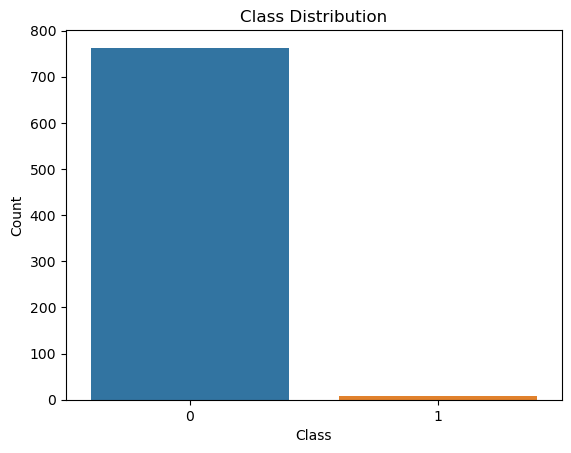

In [51]:
sns.barplot(x=class_counts.index, y=class_counts.values)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

plt.show()

In [52]:
Amount = normalize([df['Amount']])[0]
df['Amount'] = Amount
df = df.iloc[:, 1:]
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.025729,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000463,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.065115,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.021237,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.012036,0


In [53]:
x = df.drop('Class', axis=1)
y = df['Class']   # target variable

sampler = RandomOverSampler(sampling_strategy=0.95)
x_resample, y_resample = sampler.fit_resample(x, y)

In [54]:
x_resample.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
1482,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,-0.066407,...,0.002974,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,0.000172
1483,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.000000
1484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,-0.574775,...,-0.118283,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,0.000172
1485,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,-0.574775,...,-0.118283,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,0.000172
1486,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,-0.066407,...,0.002974,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,0.000172


In [55]:
y_resample.tail()

1482    1
1483    1
1484    1
1485    1
1486    1
Name: Class, dtype: int64

In [56]:
resampled_df = pd.concat([x_resample, y_resample], axis=1)
resampled_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.025729,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000463,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.065115,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.021237,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.012036,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,-0.066407,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,0.000172,1
1483,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.000000,1
1484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,-0.574775,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,0.000172,1
1485,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,-0.574775,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,0.000172,1


# Simple Random Sampling

In [57]:
#Simple Random Sampling
n = int(((1.96**2)*(0.5**2))/(0.05**2))   # 1.96 is Z score for 95% confidence level, 0.5 represents assumed variance
SimpleSampling = resampled_df.sample(n=n, random_state=42) # random_state = 42 ensures reproducibility
SimpleSampling.shape

(384, 30)

In [58]:
x = SimpleSampling.drop('Class', axis=1)
y = SimpleSampling['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier(random_state=42)
gbm_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(random_state=42)

models = [rf_model, lr_model, dt_model, gbm_model, svm_model]
model_names = ['Random Forest', 'Logistic Regression', 'Decision Trees', 'Gradient Boosting', 'Support Vector Machines']

accuracies = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} : {accuracy:.4f}")



Random Forest : 1.0000
Logistic Regression : 0.8831
Decision Trees : 0.9610
Gradient Boosting : 0.9870
Support Vector Machines : 0.8831


# Cluster Sampling


In [59]:
import random

num_clusters = 8

kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=42)

clusters = kmeans.fit_predict(resampled_df)
clusters = pd.Series(clusters)

selected_clusters = random.sample(range(num_clusters), 4)
ClusterSample = resampled_df.loc[clusters.isin(selected_clusters)]
print(ClusterSample.shape)

(543, 30)


In [60]:
x = ClusterSample.drop('Class', axis=1)
y = ClusterSample['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier(random_state=42)
gbm_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(random_state=42)

models = [rf_model, lr_model, dt_model, gbm_model, svm_model]
model_names = ['Random Forest', 'Logistic Regression', 'Decision Trees', 'Gradient Boosting', 'Support Vector Machines']

accuracies = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} : {accuracy:.4f}")


Random Forest : 1.0000
Logistic Regression : 0.9450
Decision Trees : 0.9908
Gradient Boosting : 0.9908
Support Vector Machines : 0.9908


# Systematic Sampling

In [61]:
SystematicSampling = resampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

sampling_interval = 2
SystematicSample = SystematicSampling.iloc[::sampling_interval]
SystematicSample.shape

(744, 30)

In [62]:
x = SystematicSample.drop('Class', axis=1)
y = SystematicSample['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier(random_state=42)
gbm_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(random_state=42)

models = [rf_model, lr_model, dt_model, gbm_model, svm_model]
model_names = ['Random Forest', 'Logistic Regression', 'Decision Trees', 'Gradient Boosting', 'Support Vector Machines']

accuracies = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} : {accuracy:.4f}")


Random Forest : 1.0000
Logistic Regression : 0.8993
Decision Trees : 1.0000
Gradient Boosting : 1.0000
Support Vector Machines : 0.9530


# Bootstrap Sampling

In [63]:
n_bootstrap = 100
desired_sample_size = 400
BootstrapSamples = pd.DataFrame()
for _ in range(n_bootstrap):
    resampled_data = resampled_df.sample(n=len(df), replace=True, random_state=42)
    BootstrapSamples = pd.concat([BootstrapSamples, resampled_data])
    if BootstrapSamples.shape[0] >= desired_sample_size:
        break
BootstrapSamples = BootstrapSamples.iloc[:desired_sample_size, :]
print("Final Shape of Bootstrap Samples DataFrame:", BootstrapSamples.shape)

Final Shape of Bootstrap Samples DataFrame: (400, 30)


In [64]:
x = BootstrapSamples.drop('Class', axis=1)
y = BootstrapSamples['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier(random_state=42)
gbm_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(random_state=42)

models = [rf_model, lr_model, dt_model, gbm_model, svm_model]
model_names = ['Random Forest', 'Logistic Regression', 'Decision Trees', 'Gradient Boosting', 'Support Vector Machines']

accuracies = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} : {accuracy:.4f}")

Random Forest : 1.0000
Logistic Regression : 0.9250
Decision Trees : 0.9625
Gradient Boosting : 1.0000
Support Vector Machines : 0.9750


# Stratified Sampling

In [65]:
n = int((1.96*1.96 * 0.5*0.5)/((0.05)**2))
StratifiedSampling = resampled_df.groupby('Class')
StratifiedSample=StratifiedSampling.sample(frac= 0.45)
StratifiedSample.shape

(669, 30)

In [66]:
x = StratifiedSample.drop('Class', axis=1)
y = StratifiedSample['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier(random_state=42)
gbm_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(random_state=42)

models = [rf_model, lr_model, dt_model, gbm_model, svm_model]
model_names = ['Random Forest', 'Logistic Regression', 'Decision Trees', 'Gradient Boosting', 'Support Vector Machines']

accuracies = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} : {accuracy:.4f}")


Random Forest : 1.0000
Logistic Regression : 0.9403
Decision Trees : 0.9627
Gradient Boosting : 0.9701
Support Vector Machines : 0.9776


c:\Users\arora\miniconda3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arora\miniconda3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


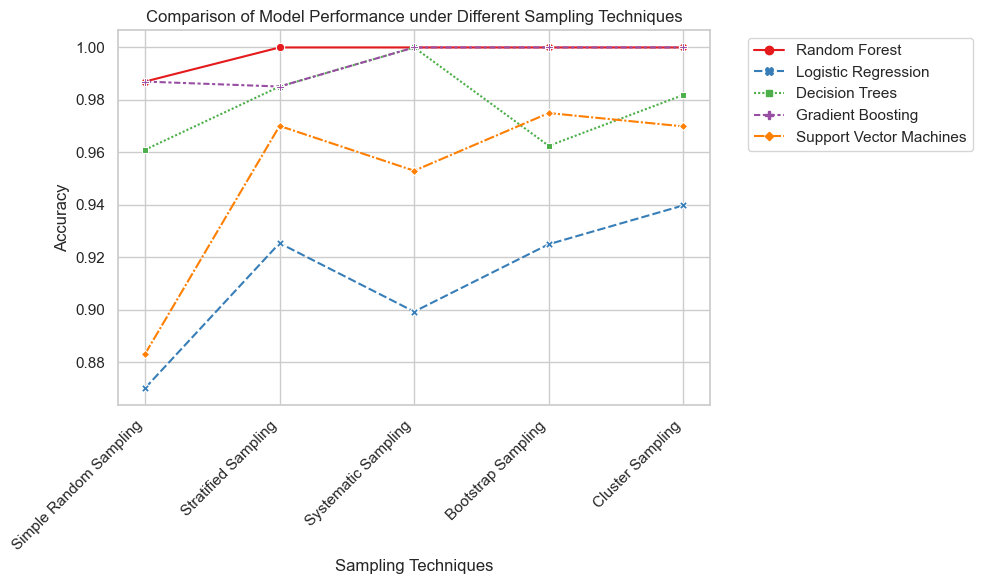

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sampling_techniques = ['Simple Random Sampling', 'Stratified Sampling', 'Systematic Sampling', 'Bootstrap Sampling', 'Cluster Sampling']
model_names = ['Random Forest', 'Logistic Regression', 'Decision Trees', 'Gradient Boosting', 'Support Vector Machines']

accuracy_results = [[0.9870, 0.8701, 0.9610, 0.9870, 0.8831],
                    [1.0000, 0.9254, 0.9851, 0.9851, 0.9701],
                    [1.000, 0.8993, 1.000, 1.000, 0.9530],
                    [1.000, 0.9250, 0.9625, 1.000, 0.9750],
                    [1.000, 0.9398, 0.9819, 1.000, 0.9699]]

results_df = pd.DataFrame(accuracy_results, columns=model_names, index=sampling_techniques)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Adding grid lines for better readability
sns.lineplot(data=results_df, markers=True, palette="Set1")  # Using a different color palette
plt.title('Comparison of Model Performance under Different Sampling Techniques')
plt.xlabel('Sampling Techniques')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


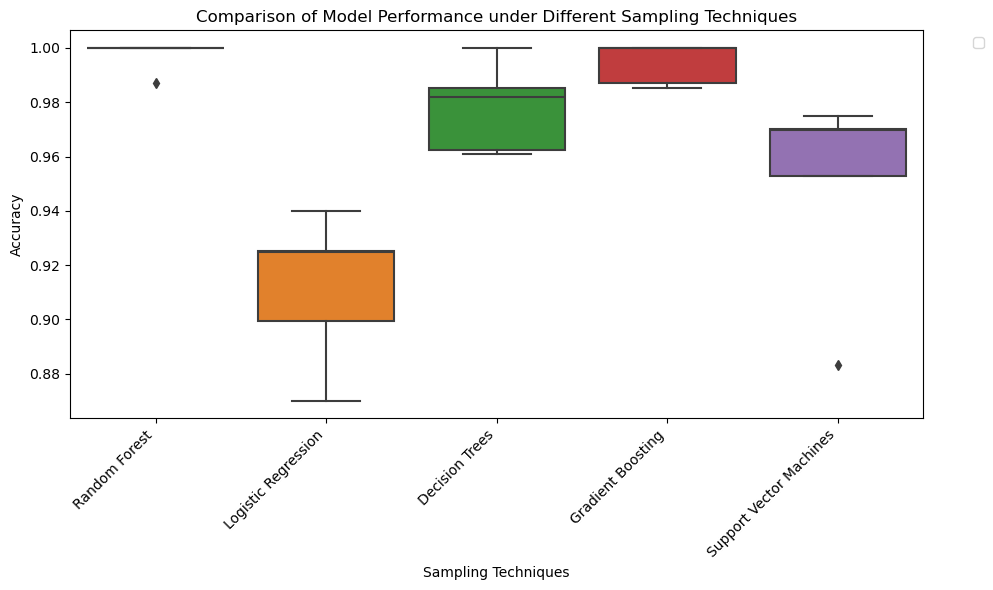

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df)
plt.title('Comparison of Model Performance under Different Sampling Techniques')
plt.xlabel('Sampling Techniques')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()